In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

This part of the assignment deals with discrete Fourier transform as well as python programming.

## Instructions:

Please rename this file with Your Roll No.

1.   Only edit at "### WRITE YOUR CODE HERE"
2.   Please rename this file with Your Roll No.
3.   Render (Kernel > Restart & Run All) before submitting, so that we can see your graphs here




In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray

Upload 'pic1.png' and 'pic2.jpg' files manually to your google colab working directory:

1. Click on the folder drawing button on the left below the <> sign.
2. Click on Upload to session storage button to upload the images.

In [3]:
img = imread('pic1.jpg')

Run below code block to display the uploaded image.

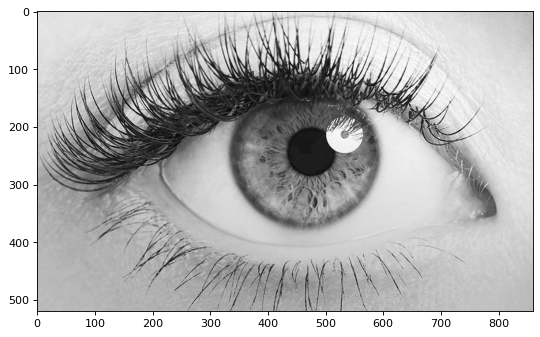

In [4]:
img_gray = rgb2gray(img)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img_gray, cmap='gray');

Calculate the 2-D Fourier Transform of the input image



In [5]:
def dft_xs(img_gray):
    '''
    Inputs:
        img_gray - Original image size N x N
    Outputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
    '''
    ### Begin

    f = np.fft.fft2(img_gray)
    
    fshift = np.fft.fftshift(f)
    
    Xs = np.abs(fshift)
    
    fs = np.angle(fshift, deg=False)
    

    ### End
    return Xs, fs

Calculate the 2-D Inverse Fourier Transform of the input image

In [6]:
def idft_xs(Xs,fs):
    '''
    Inputs:
        Xs: magnitude spectrum of size N x N
        fs: phase spectrum of size N x N
        
    Outputs:
        img_gray_recon - Original image size N x N
    '''
    ### Begin 

    s = Xs*np.exp(1j*fs)
    
    shift = np.fft.ifftshift(s)
    
    idft = np.fft.ifft2(shift)
    
    img_gray_recon = np.abs(idft)

    ### End
    return img_gray_recon

Low Pass filtering of the image in frequency domain

In [7]:
def lowpass(img_gray, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                  - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2
    
    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Also, use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  h,w=img_gray.shape[:2]
  mask = np.zeros((h,w))
  h_cent=int(h/2)
  w_cent=int(w/2)
  for i in range (h):
    for j in range(w):
      if(((i-h_cent)*(i-h_cent))+((j-w_cent)*(j-w_cent)) < (fc*fc)):
                mask[i,j]=1
    
  dft=dft_xs(img_gray)

  mag=dft[0]
  phase=dft[1]  
  for i in range(h):
        for j in range(w):
            mag[i,j]=mag[i,j]*mask[i,j]
  img_out_low = idft_xs(mag,phase)

    ### End
  return img_out_low

High Pass filtering of the image in frequency domain

In [8]:
def highpass(img_gray, fc):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fc        - cutoff frequency 
                     - 0 < fc < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  h,w=img_gray.shape[:2]
  mask = np.zeros((h,w))
  h_cent=int(h/2)
  w_cent=int(w/2)
  for i in range (h):
    for j in range(w):
      if(((i-h_cent)*(i-h_cent))+((j-w_cent)*(j-w_cent)) > (fc*fc)):
                mask[i,j]=1
    
  dft=dft_xs(img_gray)
  mag=dft[0]
  phase=dft[1]  
  for i in range(h):
        for j in range(w):
            mag[i,j]=mag[i,j]*mask[i,j]
  img_out_high = idft_xs(mag,phase)              
    

    ### End
  return img_out_high

Band Reject filtering of the image in frequency domain

In [9]:
def bandreject(img_gray, fL, fH):
  '''
    Inputs:
           img_gray  - grayscaled image of size N x N
           fL & fH   - cutoff frequency 
                     - 0 < fL < fH < sqrt(img.shape[0]*img.shape[1])/2

    Outputs:
           out_img - filtered image of size N x N

    Note:  You are allowed to use any cv2.dft or cv2.idft module or any other suitable module in numpy and cv2.
           Use dft_xs() and idft_xs() in the code.
                  
  '''
    ### Begin

  h,w=img_gray.shape[:2]
  mask = np.ones((h,w))
  h_cent=int(h/2)
  w_cent=int(w/2)
  for i in range (h):
    for j in range(w):
      if((fL*fL) <  ((i-h_cent)*(i-h_cent))+((j-w_cent)*(j-w_cent)) < (fH*fH)):
                mask[i,j]=0
    
  dft=dft_xs(img_gray)
  
  mag=dft[0]
  phase=dft[1]  
  for i in range(h):
        for j in range(w):
            mag[i,j]=mag[i,j]*mask[i,j]
  img_out_bandrej = idft_xs(mag,phase)    


    ### End
  return img_out_bandrej

In [10]:
# Do not change codes inside this cell

img2 = cv2.imread('pic2.jpg', 0)
img2 = rgb2gray(img2)

def plot_frame(gridx, gridy, subplot_id, img, name, axis=False):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    
    if axis == False:
        plt.axis("off")
    plt.title(name)

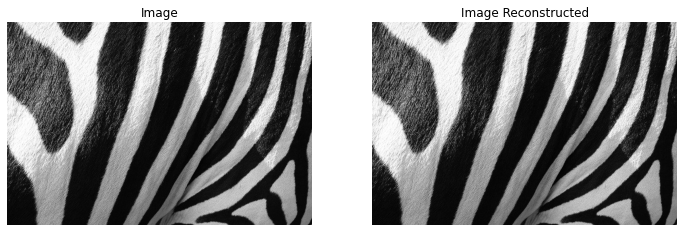

In [11]:
# Test dft_xs() and idft_xs()
# Make sure the reconstructed image looks similar to the original image

noisy_img = img2
mag_spectrum, phase_spectrum = dft_xs(img2)
noisy_img_recon = idft_xs(mag_spectrum, phase_spectrum)

plt.figure(figsize=(12, 6))
plot_frame(1, 2, 0, noisy_img, "Image")
plot_frame(1, 2, 1, noisy_img_recon, "Image Reconstructed")

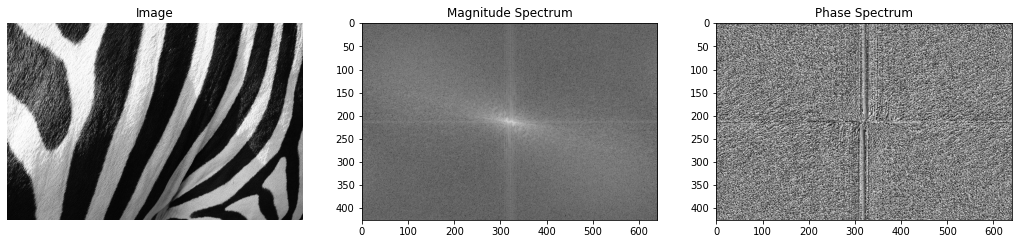

In [12]:
# Do not change codes inside this cell

mag_spectrum, phase_spectrum = dft_xs(img2)

plt.figure(figsize=(18, 6))
plot_frame(1, 3, 0, img2, "Image")

tmp = np.log(mag_spectrum)
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 1, tmp, "Magnitude Spectrum", axis=True)

tmp = phase_spectrum
tmp -= np.min(tmp)
if np.max(tmp) != 0:
    tmp /= np.max(tmp)
tmp *= 255
plot_frame(1, 3, 2, phase_spectrum, "Phase Spectrum", axis=True)

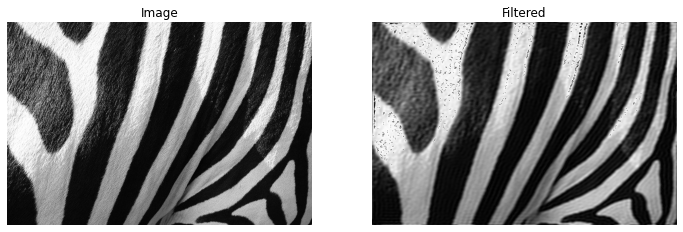

In [13]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fL and fH for
# a Band reject filter to work subjectively sufficiently

def plot_bandreject_output(fL, fH):
    if fL == ".....":
        fL = 1
        fH = int(img2.shape[0]/2)
        
    img2_filtered = bandreject(img2, fL, fH)
    plt.figure(figsize=(12, 6))
    plot_frame(1, 2, 0, img2, "Image")
    plot_frame(1, 2, 1, img2_filtered, "Filtered")


#############################
# Your part #################
#############################

# Replace with your value for fL and fH
fL = 65
fH = 260

plot_bandreject_output(fL, fH)

In [14]:
# Have a look at the phase and magnitude spectrum of the image and find a suitable fc for Low Pass and High Pass filters 
# so that the filter:
# 1. covers 25% of the area in magnitude spectrum, call it fc_quart
# 2. covers 50% of the area in magnitude spectrum, call it fc_half



#############################
fc_quart = np.sqrt(img2.shape[0]*img2.shape[1])/8

fc_half = np.sqrt(img2.shape[0]*img2.shape[1])/4
#############################



### Observations

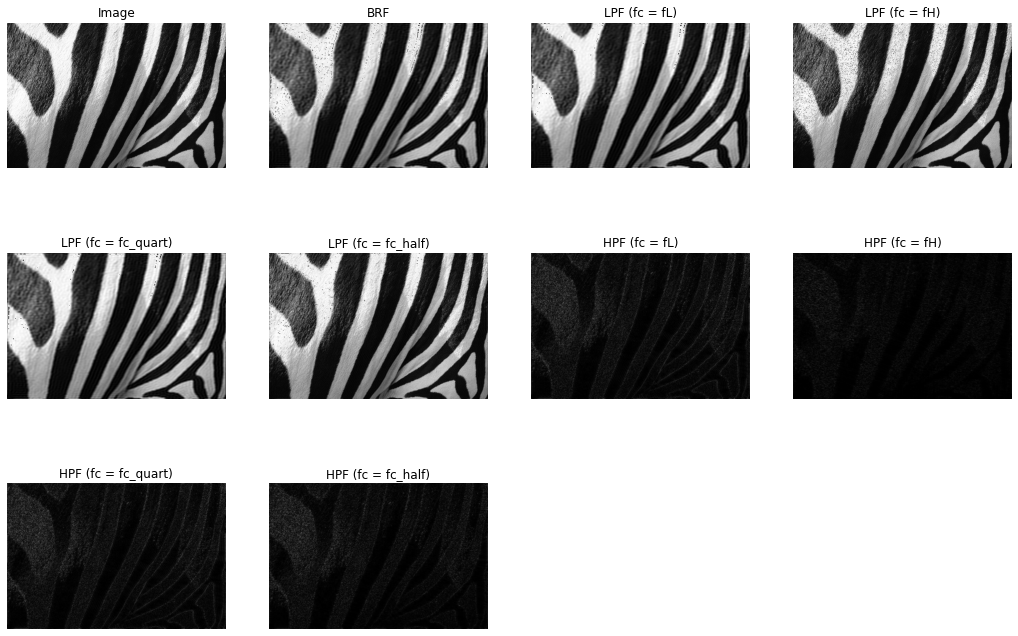

In [15]:
# Do not change codes inside this cell
# Add your observations in next cell

plt.figure(figsize=(18, 12))
plot_frame(3, 4, 0, img2, "Image")

tmp = bandreject(img2, fL, fH)
plot_frame(3, 4, 1, tmp, "BRF")

tmp = lowpass(img2, fL)
plot_frame(3, 4, 2, tmp, "LPF (fc = fL)")

tmp = lowpass(img2, fH)
plot_frame(3, 4, 3, tmp, "LPF (fc = fH)")

tmp = lowpass(img2, fc_quart)
plot_frame(3, 4, 4, tmp, "LPF (fc = fc_quart)")

tmp = lowpass(img2, fc_half)
plot_frame(3, 4, 5, tmp, "LPF (fc = fc_half)")

tmp = highpass(img2, fL)
plot_frame(3, 4, 6, tmp, "HPF (fc = fL)")

tmp = highpass(img2, fH)
plot_frame(3, 4, 7, tmp, "HPF (fc = fH)")

tmp = highpass(img2, fc_quart)
plot_frame(3, 4, 8, tmp, "HPF (fc = fc_quart)")

tmp = highpass(img2, fc_half)
plot_frame(3, 4, 9, tmp, "HPF (fc = fc_half)")

In [16]:
# Add your observations; make sure you compare all the five filtering operations done in the previous cell

your_observation = """
1. In bandreject filter a frequency band is rejected of the range fL=65 and fH=260. Even after rejecting this frequency band image looks same as original image.

2. Magnitude spectrum is mainly concentrated on centre that means at low frequencies, so rejecting high frequencies will not affect much the image. So lowpass filter provides exact 
same image as that of original image. 

3. Highpass filter allows frequencies above cut off frequency. As the image magnitude spectrum is concentrated on centre so high pass filter is providing darker image from which the 
original image is not recognizable. 

4. Quarter frequency is that cutoff frequency which covers 25% of the area in magnitude spectrum. When this cutoff frequency is used in lowpass filter, it allows the low frequencies 
which leads to the proper image reconstruction. When it is applied on highpass filter, higher frequencies are only allowed which leads to darker image and the original image is not 
eventually recognizable.

5. Half frequency is that cutoff frequency which covers 50% of the area in magnitude spectrum. When this cutoff frequency is used in lowpass filter, it allows the low frequencies 
which leads to the proper image reconstruction. When it is applied on highpass filter, higher frequencies are only allowed which leads to darker image and the original image is not 
eventually recognizable.
"""

print(your_observation)


1. In bandreject filter a frequency band is rejected of the range fL=65 and fH=260. Even after rejecting this frequency band image looks same as original image.

2. Magnitude spectrum is mainly concentrated on centre that means at low frequencies, so rejecting high frequencies will not affect much the image. So lowpass filter provides exact 
same image as that of original image. 

3. Highpass filter allows frequencies above cut off frequency. As the image magnitude spectrum is concentrated on centre so high pass filter is providing darker image from which the 
original image is not recognizable. 

4. Quarter frequency is that cutoff frequency which covers 25% of the area in magnitude spectrum. When this cutoff frequency is used in lowpass filter, it allows the low frequencies 
which leads to the proper image reconstruction. When it is applied on highpass filter, higher frequencies are only allowed which leads to darker image and the original image is not 
eventually recognizable.

5. 